In [144]:
# !pip install scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score

In [145]:
df = pd.read_csv('../data/processed/crossfit_db.csv')

In [146]:
#removing null values
df = df.dropna()

In [147]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [140]:
# Split train and test
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender', 'age', 
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]


X = df.drop(columns=drop_features)
y = df["overall_score_2023"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [141]:
# model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [148]:
def plotModelResults(
    model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False
):
    """
        Plots modelled vs fact values, prediction intervals and anomalies

    """

    prediction = model.predict(X_test)

    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=1.0)
    plt.plot(y_test.values, label="actual", linewidth=1.0)

    if plot_intervals:
        cv = cross_val_score(
            model, X_train, y_train, scoring="neg_mean_absolute_error"
        )
        mae = cv.mean() * (-1)
        deviation = cv.std()

        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)

        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)

        if plot_anomalies:
            anomalies = np.array([np.NaN] * len(y_test))
            anomalies[y_test < lower] = y_test[y_test < lower]
            anomalies[y_test > upper] = y_test[y_test > upper]
            plt.plot(anomalies, "o", markersize=10, label="Anomalies")

    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True)


def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """

    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind="bar")
    plt.grid(True, axis="y")
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles="dashed");

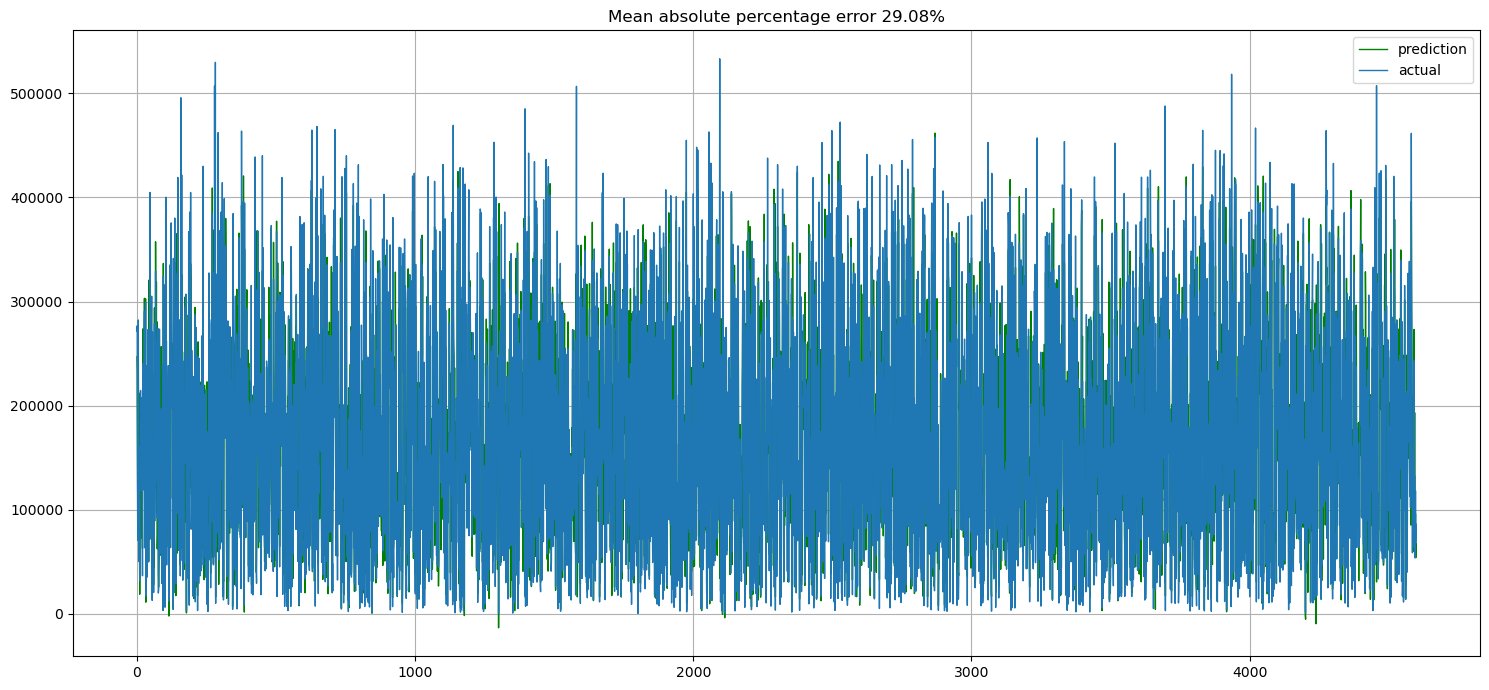

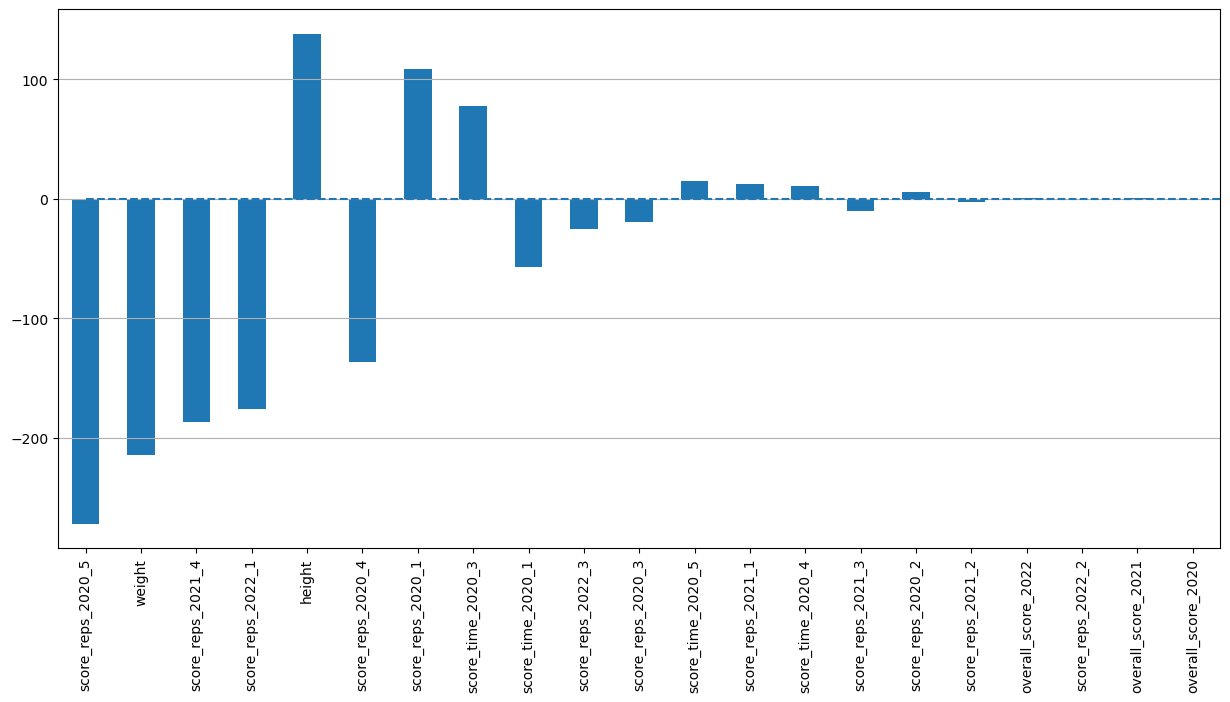

In [143]:
plotModelResults(lr)
plotCoefficients(lr)

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

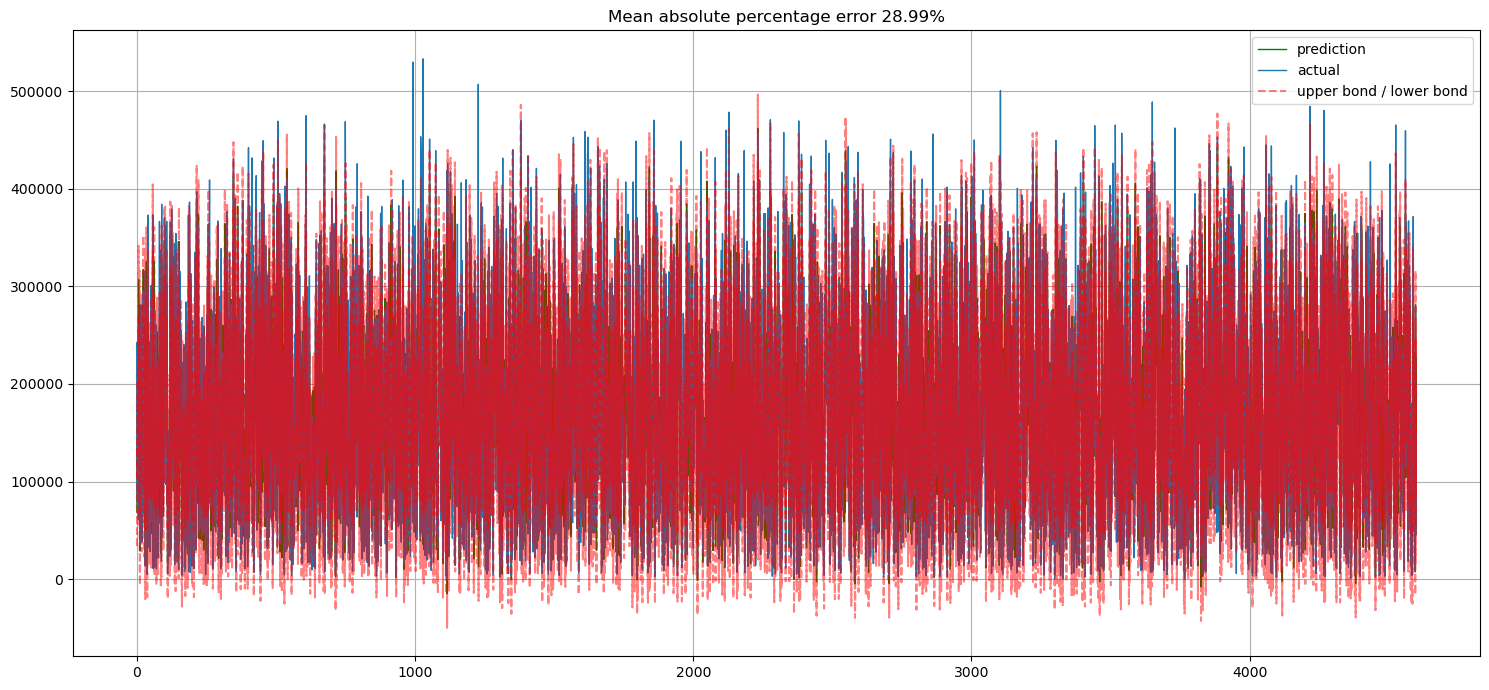

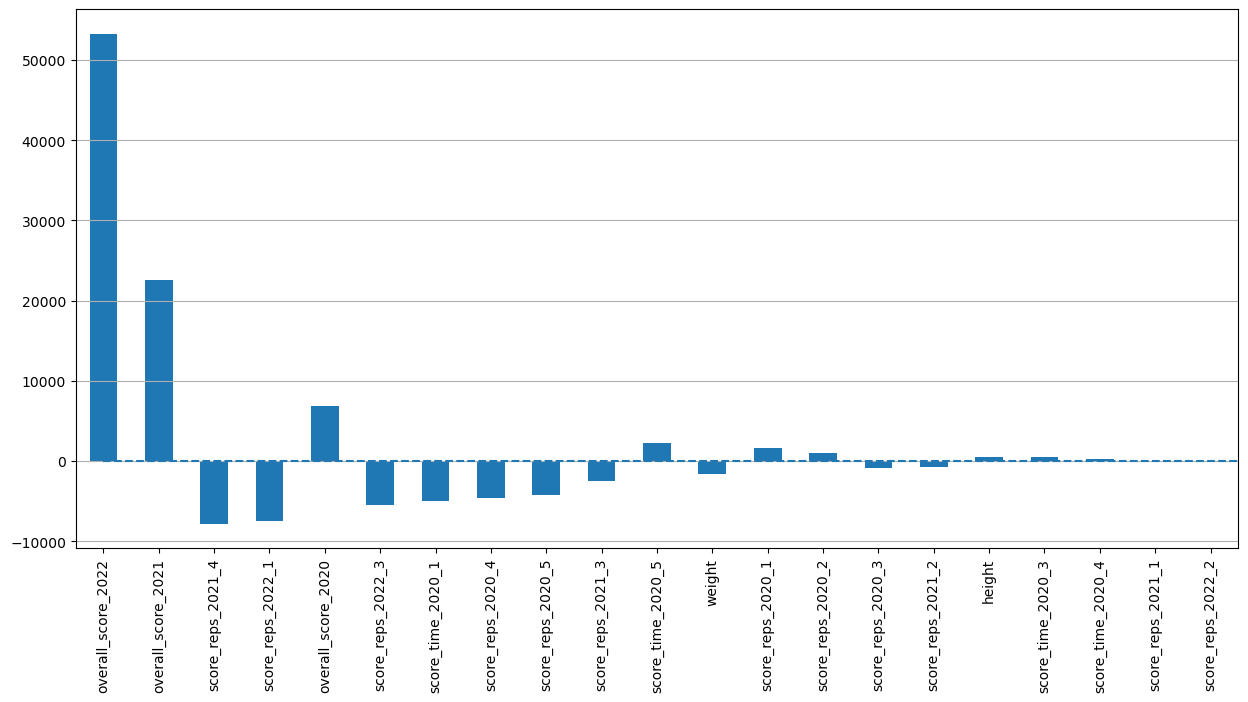

In [150]:
drop_features = ['year', 'firstName', 'lastName', 'status', 'gender', 'age', 
                 'rank_2023_1', 'rank_2023_2', 'rank_2023_3','rank_2023_4',
                 'countryOfOriginCode', 'regionId', 'affiliateId', 'affiliateName',
                 'competitorName', 'countryOfOriginName', 'regionName' ,
                 'overallRank', 'overall_score_2023',
                 'score_reps_2023_1', 'score_reps_2023_2','score_reps_2023_3','score_reps_2023_4', 'score_time_2023_4'
                 ]

y = df["overall_score_2023"]
X = df.drop(columns=drop_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: xlabel='overall_score_2023'>

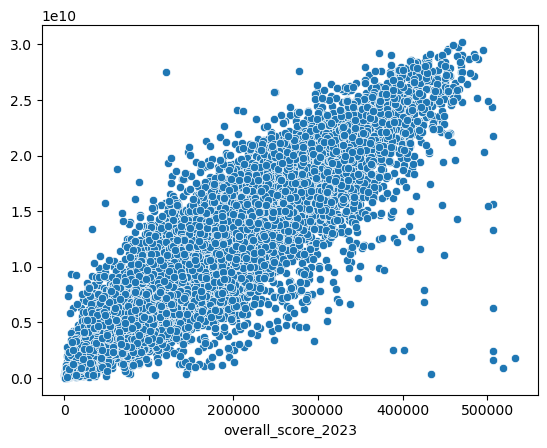

In [133]:
y_pred_train = lr.predict(X_train)
sns.scatterplot(x=y_train, y=y_pred_train)

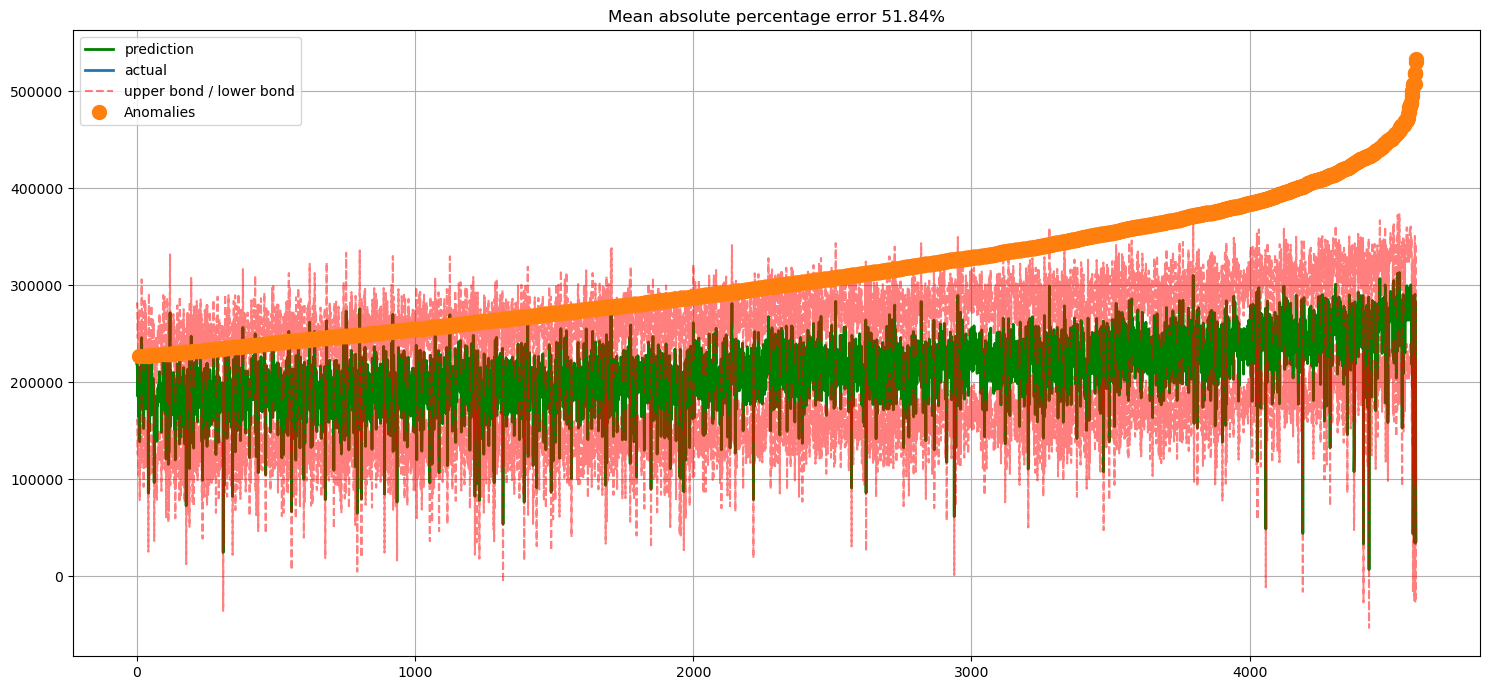

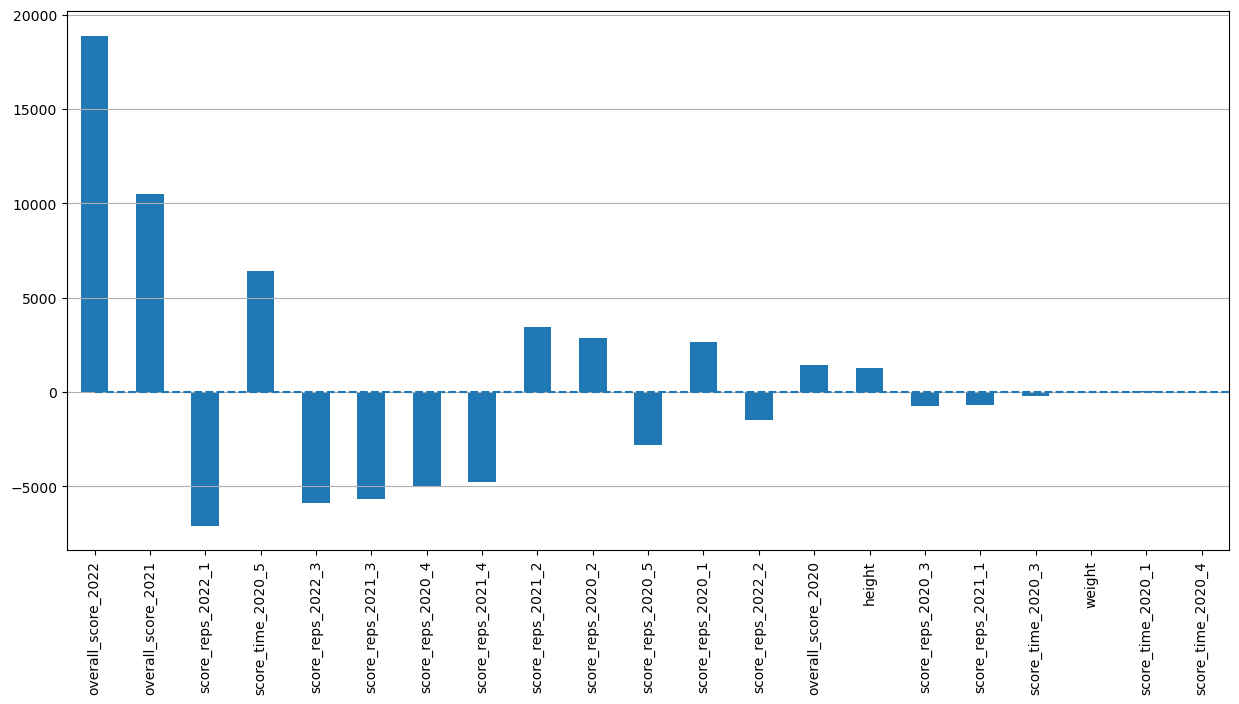

In [84]:
from sklearn.linear_model import LassoCV, RidgeCV

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(
    ridge,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)
plotCoefficients(ridge)

In [89]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.9 MB/s eta 0:00:0000:01:00:01


In [151]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=5,  random_state=42)
xgb.fit(X_train_scaled, y_train);

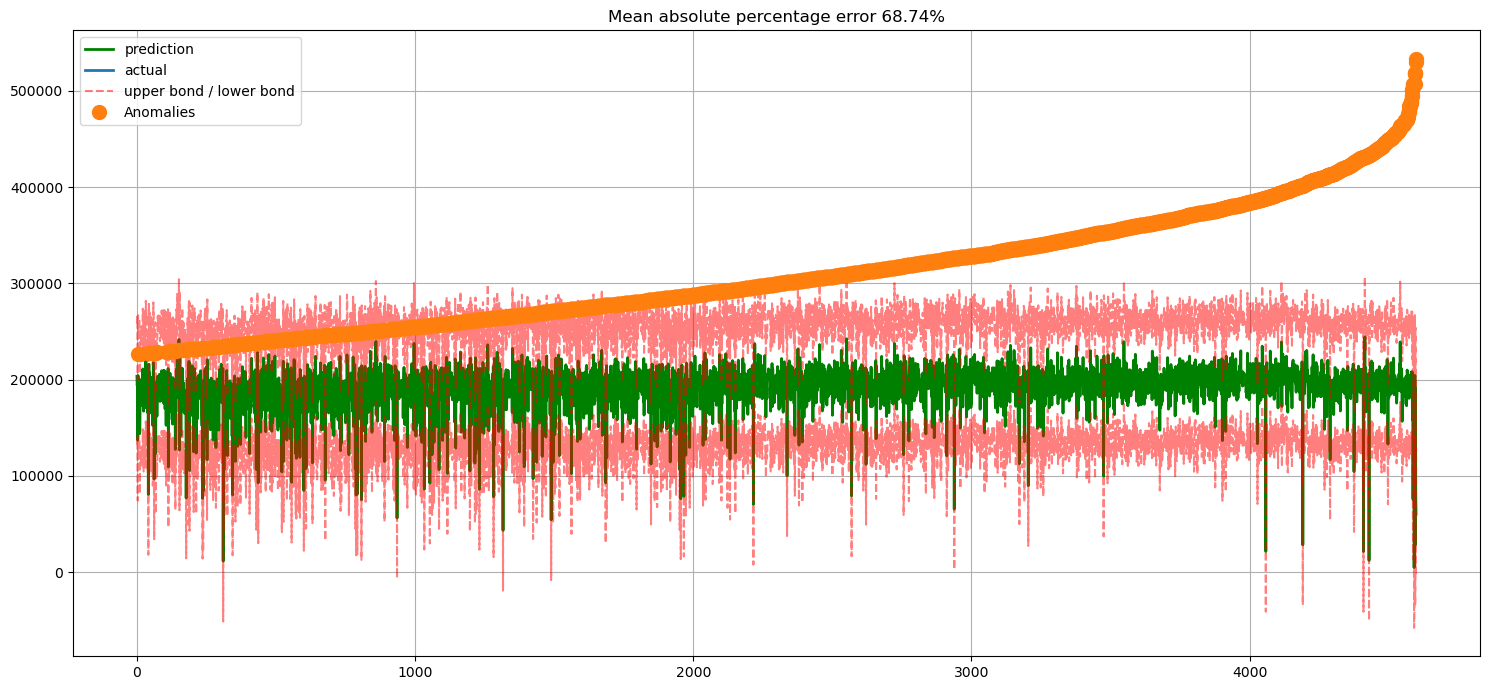

In [92]:
plotModelResults(
    xgb,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    plot_intervals=True,
    plot_anomalies=True,
)

In [94]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score



regressors = [
    KNeighborsRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [95]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.006s
	Prediction time: 0.379s
	Explained variance: 0.07310032767754415
	Mean absolute error: 119236.45814307457
	R2 score: -3.825987829846608

RandomForestRegressor()
	Training time: 13.957s
	Prediction time: 0.079s
	Explained variance: 0.006670199894645679
	Mean absolute error: 121488.99338116981
	R2 score: -4.04112739282332

DecisionTreeRegressor()
	Training time: 0.222s
	Prediction time: 0.002s
	Explained variance: -0.22993220280970972
	Mean absolute error: 119501.31659056316
	R2 score: -4.146361590039006

LinearRegression()
	Training time: 0.004s
	Prediction time: 0.001s
	Explained variance: 0.3433104686215026
	Mean absolute error: 99190.48769655352
	R2 score: -2.349091837750357

Lasso()
	Training time: 0.065s
	Prediction time: 0.002s
	Explained variance: 0.34331138253515914
	Mean absolute error: 99190.40244761037
	R2 score: -2.349086326624676

Ridge()
	Training time: 0.010s
	Prediction time: 0.002s
	Explained variance: 0.3433104846939191
	Me

In [98]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train_scaled, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.068s
	Explained variance: 0.008165047284608762
	Mean absolute error: 106256.98686671015
	R2 score: -3.088255305172564



/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


RandomForestRegressor()
	Training time: 13.773s
	Prediction time: 0.015s
	Explained variance: -0.0004103638168524437
	Mean absolute error: 181602.42570123944
	R2 score: -9.044986331246657

DecisionTreeRegressor()
	Training time: 0.221s
	Prediction time: 0.001s
	Explained variance: 1.1102230246251565e-16
	Mean absolute error: 96417.30071754729
	R2 score: -2.5494990721258124

LinearRegression()
	Training time: 0.004s
	Prediction time: 0.008s
	Explained variance: -759857640.2069803
	Mean absolute error: 6435573576.619351
	R2 score: -12118317307.346827

Lasso()
	Training time: 0.069s
	Prediction time: 0.001s
	Explained variance: -759624821.0462768
	Mean absolute error: 6434303683.199566
	R2 score: -12113602336.000555

Ridge()
	Training time: 0.002s
	Prediction time: 0.002s
	Explained variance: -759364821.7418684
	Mean absolute error: 6433553804.678039
	R2 score: -12110696018.412672



/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/mba_final/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
